The Sparks Foundation - Data Science & Business Analytics Internship


Task - Prediction using unsupervised ML

In this task we have to predict the optimum number of clusters and represent it visually, from the given 'Iris' Dataset

Author : Kanika

In [33]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wg
wg.filterwarnings ("ignore")

In [34]:
data_set = pd.read_csv("Iris.csv")

In [35]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
data_set.drop('Id' , axis=1 , inplace = True)
data_set.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

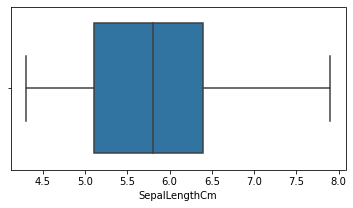

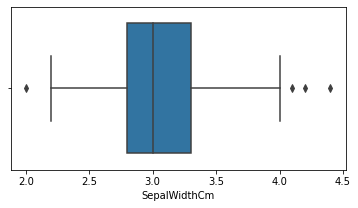

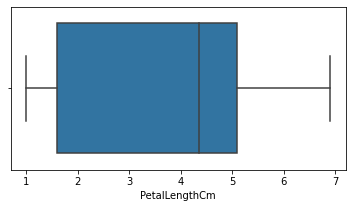

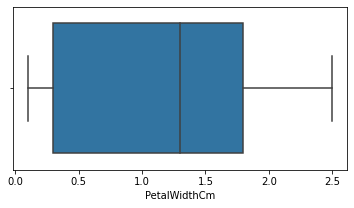

In [38]:
# Checking for any outliers in the numeric data

for i in data_set.columns:
    if data_set[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data_set[i])
        plt.show()

In [40]:
Q1,Q3=np.percentile(data_set['SepalWidthCm'],[25,75])
iqr=Q3-Q1
lower_bound=Q1-(1.5*iqr)
upper_bound=Q3+(1.5*iqr)
data_set['SepalWidthCm']= data_set['SepalWidthCm'].apply(lambda x:upper_bound if x>upper_bound
                                              else lower_bound if x<lower_bound else x)

<AxesSubplot:xlabel='SepalWidthCm'>

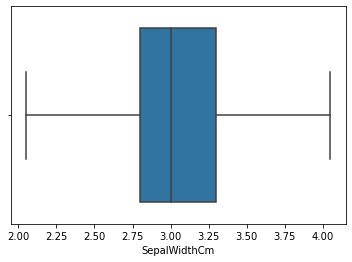

In [41]:
sns.boxplot(data_set['SepalWidthCm'])

In [43]:
x=data_set.iloc[:,:-1].values
x

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.7 , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.05, 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.1 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

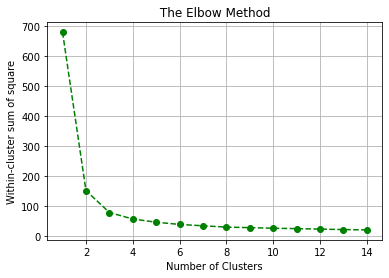

In [44]:
from sklearn.cluster import KMeans
wcss_list= []                          #Initializing the list for the values of WCSS

for i in range(1,15):                 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,15),wcss_list,"go--", color= "green")
plt.title(" The Elbow Method ")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster sum of square")
plt.grid()
plt.show()

In [45]:
kmeans=KMeans(n_clusters=3 )
y_predict = kmeans.fit_predict(x)

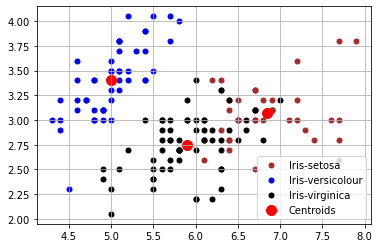

In [48]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 25, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 25, c = 'black', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()